In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


# Read the City and Ride Data
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")
# Combine the data into a single dataset
merge_data_df = pd.merge(ride_data,city_data,on="city", how = "left")

# Display the data table for preview
merge_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


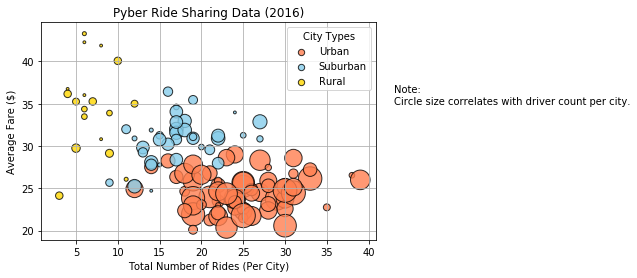

In [9]:
# grouping by city types to get x and y axis for each city type
urban = merge_data_df[merge_data_df["type"]== "Urban"].groupby(merge_data_df["city"])
suburban = merge_data_df[merge_data_df["type"]== "Suburban"].groupby(merge_data_df["city"])
rural = merge_data_df[merge_data_df["type"]== "Rural"].groupby(merge_data_df["city"])

# Urban x and y axis
urban_x = urban["ride_id"].count()
urban_y = urban["fare"].mean()
urban_size = urban["driver_count"].mean()

# Suburban x and y axis
suburban_x = suburban["ride_id"].count()
suburban_y = suburban["fare"].mean()
suburban_size = suburban["driver_count"].mean()

# Rural x and y axis
rural_x = rural["ride_id"].count()
rural_y = rural["fare"].mean()
rural_size = rural["driver_count"].mean()


plt.scatter(urban_x,urban_y, marker = "o", color=["coral"],edgecolor = "black",label = "Urban", s = urban_size * 8, alpha = 0.8 )
plt.scatter(suburban_x,suburban_y, marker = "o", color=["SkyBlue"],edgecolor = "black",label = "Suburban", s= suburban_size * 8,alpha = 0.8 )
plt.scatter(rural_x,rural_y, marker = "o", color=["gold"],edgecolor = "black",label = "Rural",s = rural_size * 8,alpha = 0.8 )
legend = plt.legend(title = "City Types", loc = "best")
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
# adding text label
plt.text(43,35,"Note: \nCircle size correlates with driver count per city.")


plt.savefig("LearnPython/PyberRideSharingData.png",bbox_inches = "tight")
plt.show()

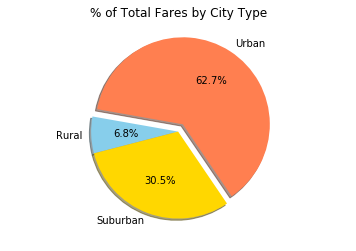

In [10]:
city_types = merge_data_df.groupby(["type"])
total_fares = city_types["fare"].sum()
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0, .1)
colors = ["skyblue", "gold","coral"]
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.pie(total_fares, labels = labels, colors = colors , startangle = 170, explode = explode,autopct="%1.1f%%", shadow = True)
plt.savefig("LearnPython/%ofTotalFaresbyCityType")

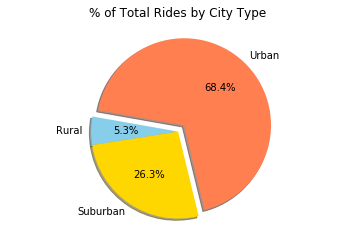

In [11]:
total_rides = city_types["ride_id"].count()
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0, .1)
colors = ["skyblue", "gold","coral"]
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.pie(total_rides, labels = labels, colors = colors , startangle = 170, explode = explode,autopct="%1.1f%%", shadow = True)
plt.savefig("LearnPython/%ofTotalRidesbyCityType")

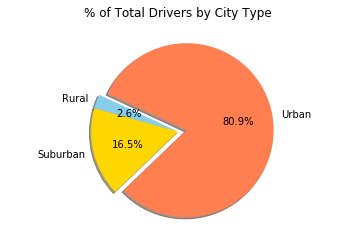

In [12]:
unique_city = city_data.groupby(["type"])
total_drivers = unique_city["driver_count"].sum()
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0, .1)
colors = ["skyblue", "gold","coral"]
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.pie(total_drivers, labels = labels, colors = colors , startangle = 155, explode = explode,autopct="%1.1f%%", shadow = True)
plt.savefig("LearnPython/%ofTotalDriversbyCityType")